In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import psycopg2

#Import database password
from postgrespwd import pwd

In [2]:
#Setting database parameters to query the database in Python:

hostname = 'localhost'
port = 5432
username = 'postgres'
password = pwd
database = 'employee_db'
 
#print "Using psycopg2…"

myConnection = psycopg2.connect( host=hostname, user=username,port=port, password=password, dbname=database )

# Query All Records in the Salaries Table, Title table and Employee table
salaries = pd.read_sql("SELECT * FROM salaries", myConnection)
titles = pd.read_sql("SELECT * FROM titles", myConnection)
employees = pd.read_sql("SELECT * FROM employees", myConnection)

myConnection.close()

In [3]:
salaries.head()

,emp_no,salaries
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


## The most common salary range

In [4]:
salaries.dtypes

emp_no      int64
salaries    int64
dtype: object

In [5]:
# Replace all NaN values with 0 
cleaned_salaries = salaries.fillna(0)

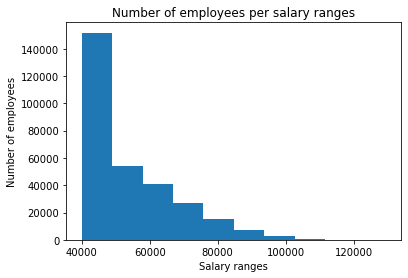

In [7]:
#Create a histogramme to visualise the most common salary range
plt.hist(cleaned_salaries["salaries"])
plt.xlabel('Salary ranges')
plt.ylabel('Number of employees')
plt.title('Number of employees per salary ranges')
plt.show()

### Analysis:
The most common salary range is below $50000.

## The average salary by title

In [8]:
#Checking the tables titles and employees to link the salaries with titles
#titles = pd.read_csv("../data/titles.csv")
#employees = pd.read_csv("../data/employees.csv")

In [9]:
employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [10]:
titles.head()

,title_id,titles
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [11]:
#Merging the three tables employees, salaries and titles:
df1 = pd.merge(salaries, employees, on='emp_no',how="left")
df1

,emp_no,salaries,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,65828,s0001,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,78228,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...,...,...
300019,499995,40000,e0002,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,58058,e0003,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,49597,e0003,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,40000,s0001,1956-09-05,Patricia,Breugel,M,1993-10-13


In [12]:
#Merging df1 with titles
df2 = df1.merge(titles, left_on='emp_title_id', right_on='title_id')
df2

,emp_no,salaries,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,titles
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26,e0003,Senior Engineer
1,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28,e0003,Senior Engineer
2,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01,e0003,Senior Engineer
3,10006,40000,e0003,1953-04-20,Anneke,Preusig,F,1989-06-02,e0003,Senior Engineer
4,10009,60929,e0003,1952-04-19,Sumant,Peac,F,1985-02-18,e0003,Senior Engineer
...,...,...,...,...,...,...,...,...,...,...
300019,111534,48077,m0001,1952-06-27,Hilary,Kambil,F,1988-01-31,m0001,Manager
300020,111692,40000,m0001,1954-10-05,Tonny,Butterworth,F,1985-01-01,m0001,Manager
300021,111784,40000,m0001,1956-06-14,Marjo,Giarratana,F,1988-02-12,m0001,Manager
300022,111877,53846,m0001,1962-10-18,Xiaobin,Spinelli,F,1991-08-17,m0001,Manager


In [13]:
# Replace all NaN values with 0 
cleaned_df2 = df2.fillna(0)
cleaned_df2

,emp_no,salaries,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,titles
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26,e0003,Senior Engineer
1,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28,e0003,Senior Engineer
2,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01,e0003,Senior Engineer
3,10006,40000,e0003,1953-04-20,Anneke,Preusig,F,1989-06-02,e0003,Senior Engineer
4,10009,60929,e0003,1952-04-19,Sumant,Peac,F,1985-02-18,e0003,Senior Engineer
...,...,...,...,...,...,...,...,...,...,...
300019,111534,48077,m0001,1952-06-27,Hilary,Kambil,F,1988-01-31,m0001,Manager
300020,111692,40000,m0001,1954-10-05,Tonny,Butterworth,F,1985-01-01,m0001,Manager
300021,111784,40000,m0001,1956-06-14,Marjo,Giarratana,F,1988-02-12,m0001,Manager
300022,111877,53846,m0001,1962-10-18,Xiaobin,Spinelli,F,1991-08-17,m0001,Manager


In [15]:
#Average salary by title
title_group = cleaned_df2.groupby("titles")
#Calculate the aveage salary per title
avg_salary = pd.DataFrame(title_group["salaries"].mean())
#Renaming the column to average salary
avg_salary.columns = ["Average Salary"]
avg_salary

,Average Salary
titles,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


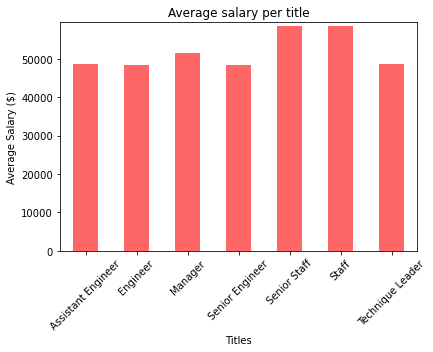

<Figure size 432x288 with 0 Axes>

In [17]:
#Creating a bar chart representing the average salary per title
avg_salary.plot(kind="bar", facecolor="red", alpha=0.6, rot= 45, figsize=(6.4,4.2), legend = None)
# Set textual properties
plt.title("Average salary per title")
plt.ylabel("Average Salary ($)")
plt.xlabel("Titles")
plt.xlim(-0.5,len(avg_salary)-0.5)
plt.ylim(0,max(avg_salary["Average Salary"])+1000)
# Show plot
plt.show()
plt.tight_layout()